# Project: Unsupervised Learning - AllLife Credit Card Customer Segmentation

# **Background and Context:**

All Life Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

# **Objective:**

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

# **Key Questions:**
1.	How many different segments of customers are there?
2.	How are these segments different from each other?
3.	What are your recommendations to the bank on how to better market to and service these customers?


# **Data Description:**

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.
•	Customer key - Identifier for the customer
•	Average Credit Limit - Average credit limit across all the credit cards
•	Total credit cards - Total number of credit cards
•	Total visits bank - Total number of bank visits
•	Total visits online - total number of online visits
•	Total calls made - Total number of calls made by the customer


## Index

- <a href = #link1>1. Overview of the dataset </a>


- <a href = #link2>2. Perform univariate analysis, perform EDA, and create visualizations to explore data. (10 marks) </a> 


- <a href = #link3>3. Execute K-means clustering use elbow plot and analyze clusters using boxplot (10 marks) </a>


- <a href = #link4>4. Execute hierarchical clustering (15 marks) </a> 


- <a href = #link5>5. Calculate the average silhouette score for both methods. (5 marks) </a>


- <a href = #link6>6. Compare each cluster of K-means to Hierarchical clusters. (5 marks) </a>


- <a href = #link7>7. Analysis of the clusters formed (10 marks) </a>


- <a href = #link8>8. comment on the codes (5 marks) </a>

## <a id = "link1"></a> 1. Overview of the dataset 

**Importing required libraries.**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
data = pd.read_excel("Credit Card Customer Data.xlsx")

## <a id = "link2"></a> 2.	Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

### View the first and last 5 rows of the dataset.

In [3]:
data.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

### Understand the shape of the dataset.

In [4]:
data.shape

(660, 7)

The dataset has 660 rows and 7 columns

### Check the data types of the columns for the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- all the variables are integers.

### Check the percentage of missing values in each column

In [6]:
pd.DataFrame(data={'% of Missing Values':round(data.isnull().sum()/data.isnull().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

% of Missing Values
Sl_No                                0.0
Customer Key                         0.0
Avg_Credit_Limit                     0.0
Total_Credit_Cards                   0.0
Total_visits_bank                    0.0
Total_visits_online                  0.0
Total_calls_made                     0.0

- There were zero missing values for this dataset.

In [7]:
data.drop(columns=['Sl_No'], inplace=True)
data.drop(columns=['Customer Key'], inplace=True)

### Summary of the dataset.

In [8]:
data.describe().T

count          mean           std     min      25%  \
Avg_Credit_Limit     660.0  34574.242424  37625.487804  3000.0  10000.0   
Total_Credit_Cards   660.0      4.706061      2.167835     1.0      3.0   
Total_visits_bank    660.0      2.403030      1.631813     0.0      1.0   
Total_visits_online  660.0      2.606061      2.935724     0.0      1.0   
Total_calls_made     660.0      3.583333      2.865317     0.0      1.0   

                         50%      75%       max  
Avg_Credit_Limit     18000.0  48000.0  200000.0  
Total_Credit_Cards       5.0      6.0      10.0  
Total_visits_bank        2.0      4.0       5.0  
Total_visits_online      2.0      4.0      15.0  
Total_calls_made         3.0      5.0      10.0

In [9]:
data.describe()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count        660.000000          660.000000         660.000000   
mean       34574.242424            4.706061           2.403030   
std        37625.487804            2.167835           1.631813   
min         3000.000000            1.000000           0.000000   
25%        10000.000000            3.000000           1.000000   
50%        18000.000000            5.000000           2.000000   
75%        48000.000000            6.000000           4.000000   
max       200000.000000           10.000000           5.000000   

       Total_visits_online  Total_calls_made  
count           660.000000        660.000000  
mean              2.606061          3.583333  
std               2.935724          2.865317  
min               0.000000          0.000000  
25%               1.000000          1.000000  
50%               2.000000          3.000000  
75%               4.000000          5.000000  
max              15.000000         10.000000

- Avg_Credit_Limit is anticipated to be highley right skewed with several outliers.
- Total_Credit_Cards is anticipated to be slightly right skewed.
- Total_visits_bank is going to be relatively distrubuted.
- Total_visits_online is anticipated to be highley right skewed with several outliers.
- Total_calls_made is anticipated to be slightly right skewed.

In [10]:
data.nunique()

Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Avg_Credit_Limit has a large number of unique variables.
- The other four variables do not appear out of the ordinary.

### Univariate analysis

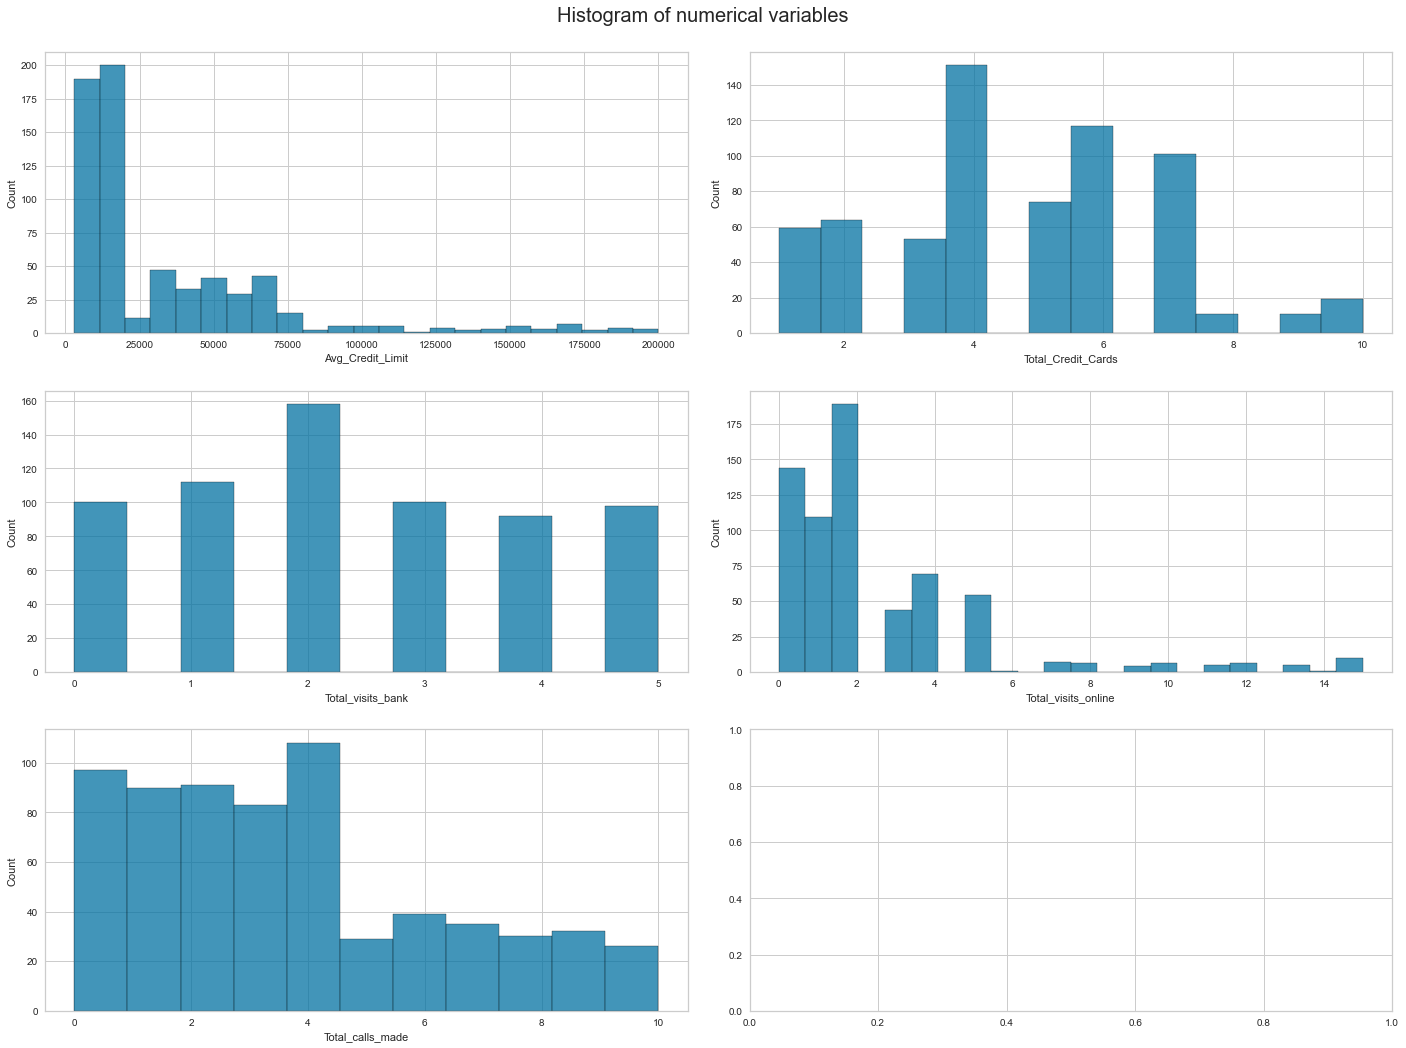

In [11]:
# select numerical columns
all_col = data.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.histplot(ax=axes[ii][0],x=data[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.histplot(ax=axes[ii][1],x=data[all_col[counter]])
        counter = counter+1
    else:
        pass

fig.tight_layout(pad=2.0)

- Avg_Credit_Limit: most customers have a limit under 25000 and the distrobution is highly right skewed.
- Total_Credit_Cards: four is the highest values of number of cards and is slightly right skewed.
- Total_visits_bank: two is the highest values of number of visits to bank and is slightly right skewed.
- Total_visits_online: two is the highest values of number of visits online and is highly right skewed.
- Total_calls_made: four is the highest values of calls made and is moderately right skewed.

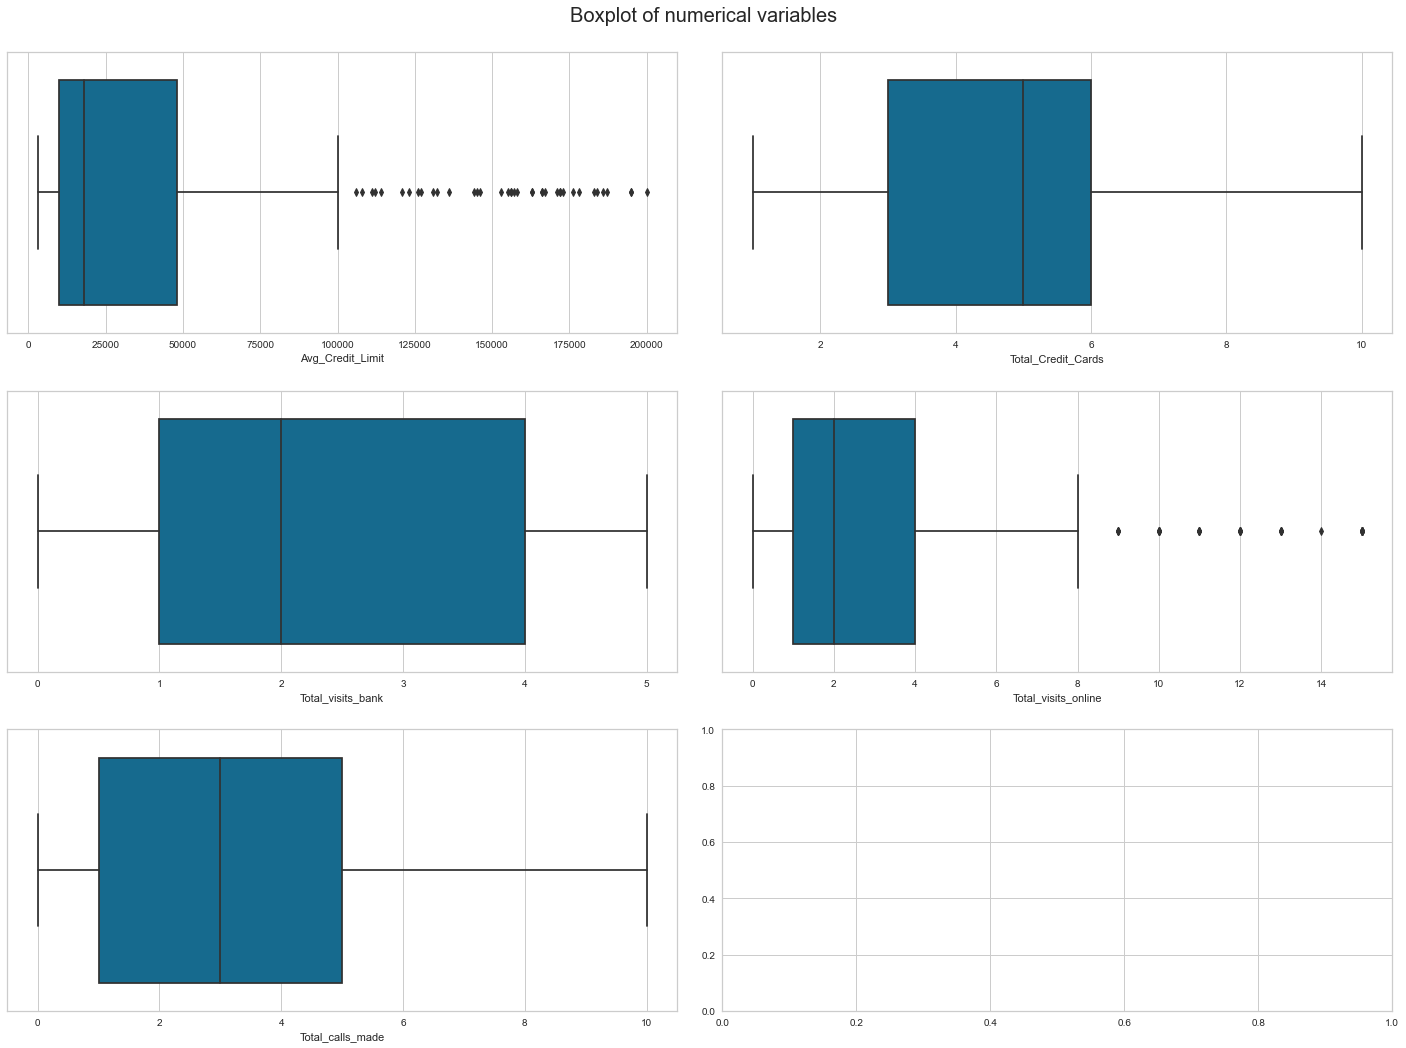

In [12]:
# selecting numerical columns
all_col = data.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('Boxplot of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.boxplot(ax=axes[ii][0],x=data[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.boxplot(ax=axes[ii][1],x=data[all_col[counter]])
        counter = counter+1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**
- Avg_Credit_Limit: the distrobution is highly right skewed and has many outliers but are consistantly spaced.
- Total_Credit_Cards: the distrobution is slightly right skewed and has no outliers.
- Total_visits_bank: the distrobution is slightly right skewed and has no outliers.
- Total_visits_online: the distrobution is highly right skewed and has many outliers but are consistantly spaced.
- Total_calls_made: the distrobution is slightly right skewed and has no outliers.

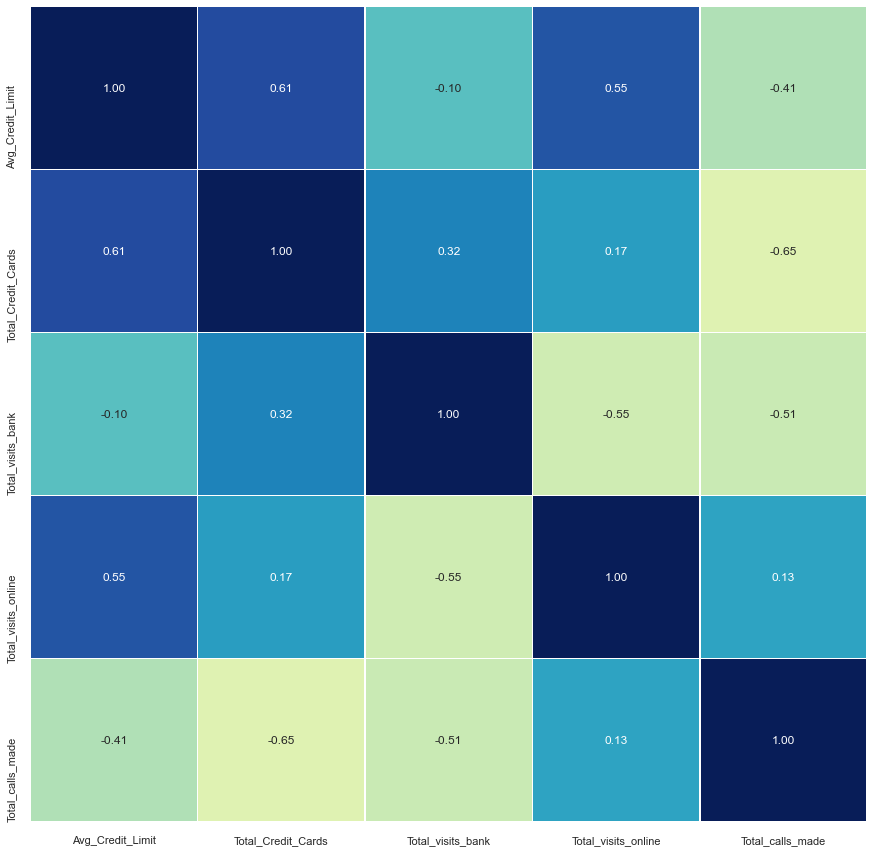

In [13]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

**Observation**
- Avg_Credit_Limit and Total_Credit_Cards are higly correlted. This is to be expected because people who spend consistently have higher limites and more credit cards.
- Total_Credit_Cards and Total_visits_bank are slightly correlated. The more credit cards you have the more time is required to address purchases or problems encountered in the purchase process.

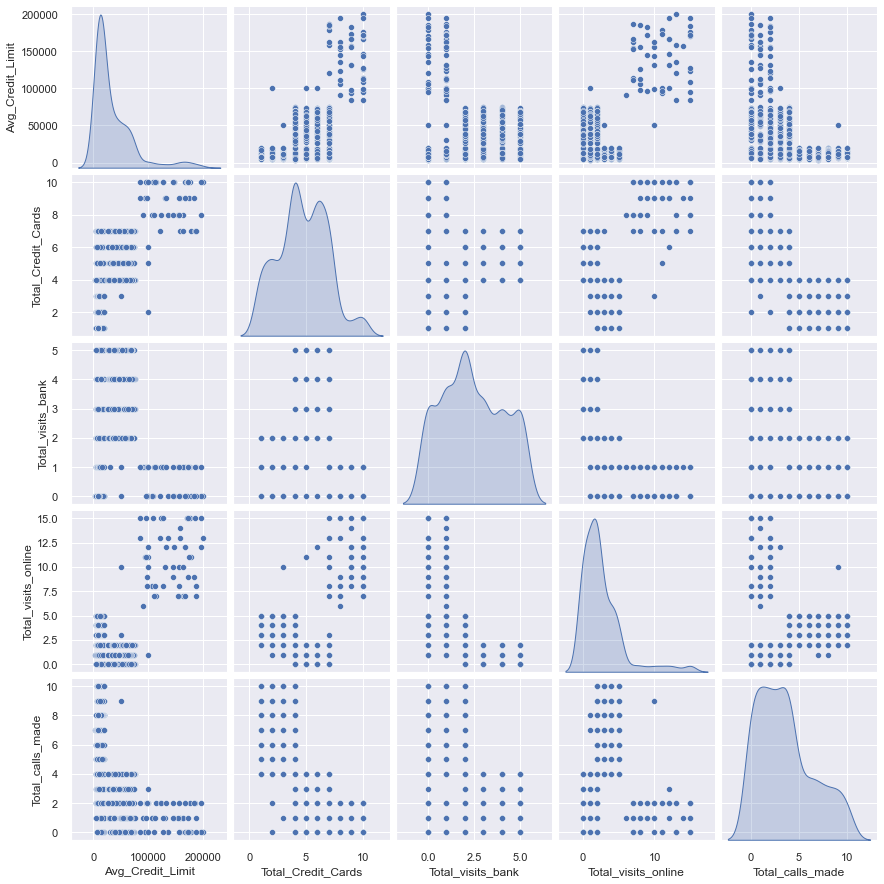

In [14]:
sns.pairplot(data[all_col],diag_kind="kde")

**Observation**
- All of the fields appear to be bimodal in nature and do not have a clear bell curve.
- Most of the fields have at least two viewable modes and some appear to have as high as four.

## <a id = "link3"></a> 3. Execute K-means clustering use elbow plot and analyze clusters using boxplot (10 marks)

In [15]:
# variables used for clustering
all_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [16]:
# Scaling the dataset before clustering
scaler=StandardScaler()
subset=data[all_col].copy()
subset_scaled=scaler.fit_transform(subset)   

In [17]:
# Creating a dataframe of the above results
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.990772333470802
Number of Clusters: 6 	Average Distortion: 0.9430691379353119
Number of Clusters: 7 	Average Distortion: 0.909633702319473
Number of Clusters: 8 	Average Distortion: 0.889372575154107


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

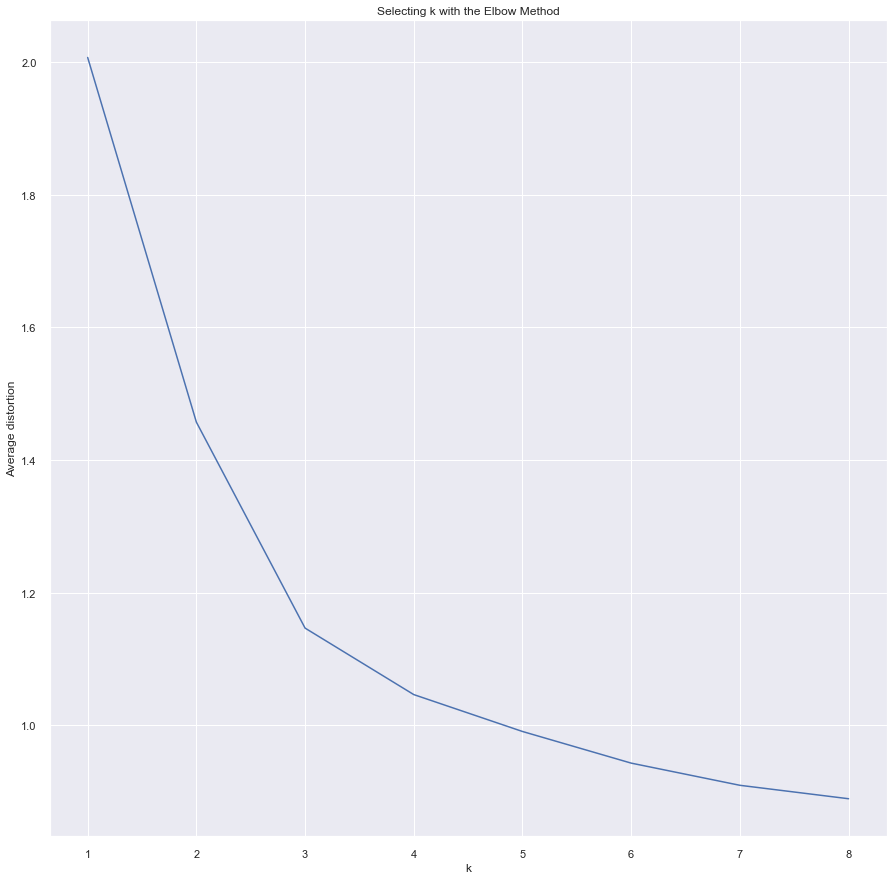

In [18]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

**Observation**
- The ideal clusters seems to be between 3 an 4.

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.2717470361089752)
For n_clusters = 6, silhouette score is 0.25588029066344975)
For n_clusters = 7, silhouette score is 0.24817058559087743)
For n_clusters = 8, silhouette score is 0.22701240622895347)
For n_clusters = 9, silhouette score is 0.2185834255939503)


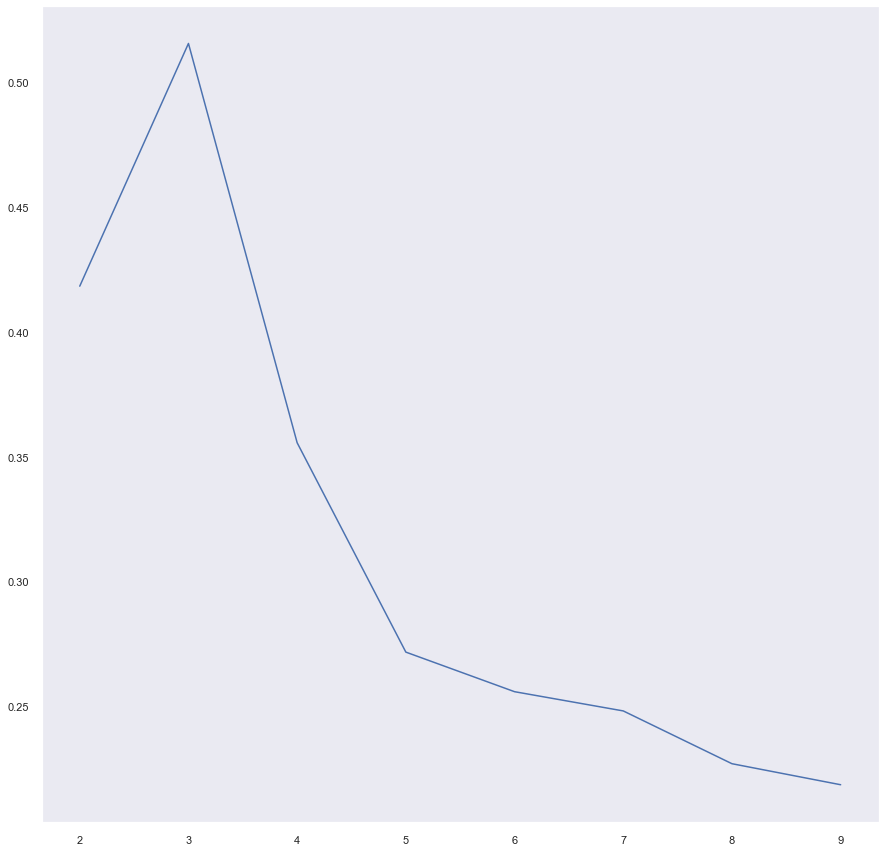

In [19]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list,sil_score)
plt.grid()

**Observation**
- From the silhouette score three appears to be the best number of clusers.

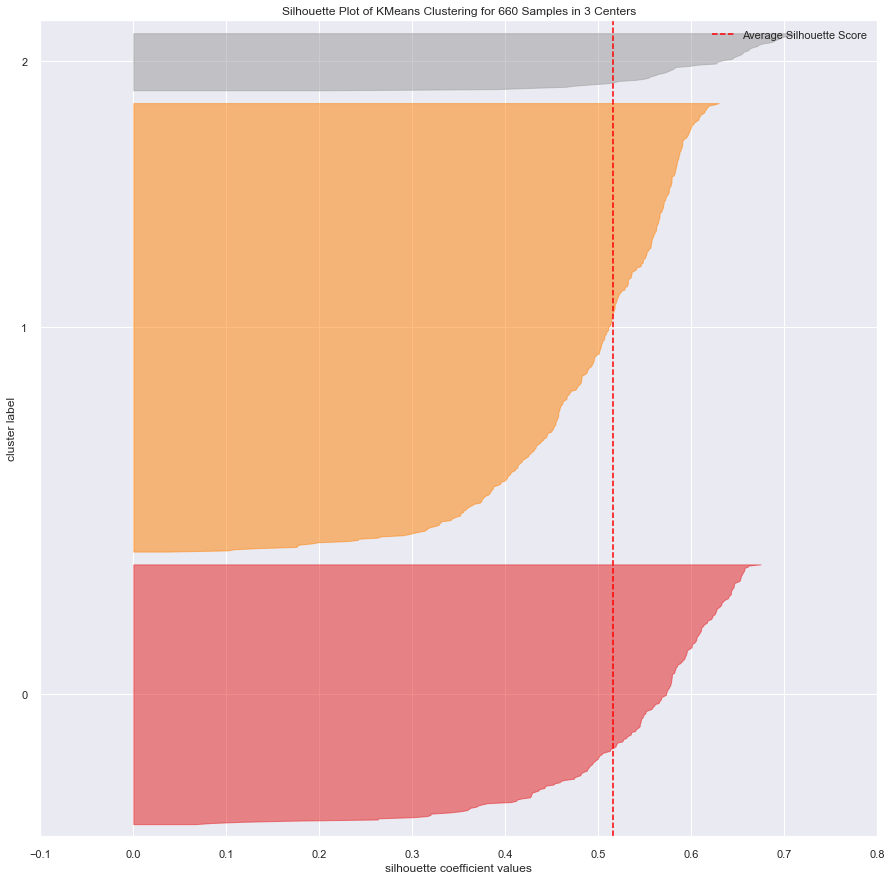

In [20]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

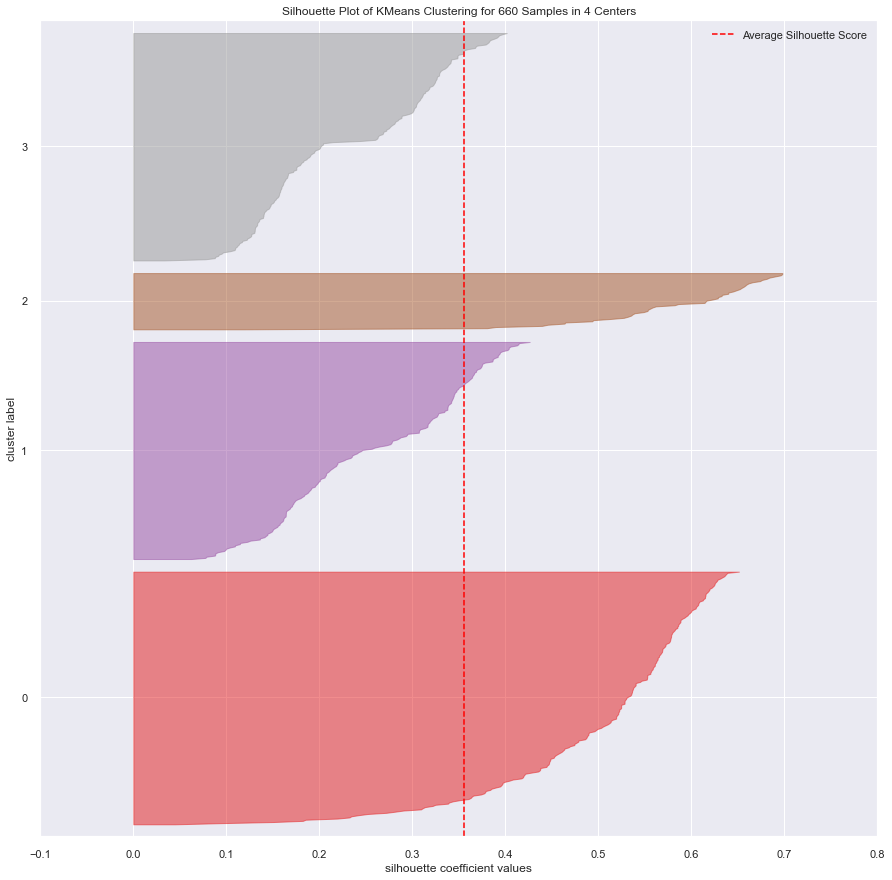

In [21]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

**Observation**
- The visual information above confirms that three is the ideal number from the silhouette analysis.

In [22]:
# lets us take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [23]:
data['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [24]:
cluster_profile = data.groupby('K_means_segments').mean()

In [25]:
cluster_profile['count_in_each_segments'] = data.groupby('K_means_segments')['Total_visits_bank'].count().values

In [26]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

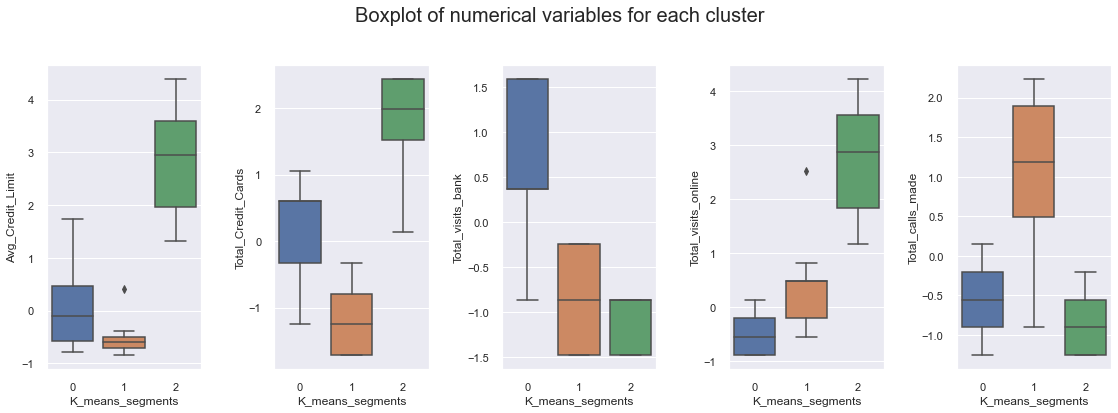

In [27]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Observation**
- This boxplot will be further analized below.

## <a id = "link4"></a>4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyze clusters formed using boxplot (15 marks)

In [28]:
# variables used for clustering
all_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [29]:
# Scaling the dataset before clustering
scaler=StandardScaler()
subset=data[all_col].copy()
subset_scaled = scaler.fit_transform(subset)   

In [30]:
# Creating a dataframe of the above results
subset_scaled_data = pd.DataFrame(subset_scaled,columns=subset.columns)

In [31]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
distance_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
        print('Cophent correlation for distance metrics {} and linkahe method {} is {}'.format(dm,lm,c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
            



Cophent correlation for distance metrics euclidean and linkahe method single is 0.8788676940541079
Cophent correlation for distance metrics euclidean and linkahe method complete is 0.8860521900934342
Cophent correlation for distance metrics euclidean and linkahe method average is 0.9168725782090766
Cophent correlation for distance metrics euclidean and linkahe method weighted is 0.9133393931042242
Cophent correlation for distance metrics chebyshev and linkahe method single is 0.8978014062578786
Cophent correlation for distance metrics chebyshev and linkahe method complete is 0.8623270916886306
Cophent correlation for distance metrics chebyshev and linkahe method average is 0.9160784250471772
Cophent correlation for distance metrics chebyshev and linkahe method weighted is 0.9109044268579872
Cophent correlation for distance metrics mahalanobis and linkahe method single is 0.8959952526724224
Cophent correlation for distance metrics mahalanobis and linkahe method complete is 0.65500231231

**Observations**
- We see the Cophent correlation for distance metrics euclidean and linkahe method average is 0.9168725782090766 is the highest score.

In [32]:
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Highest cophenet correlation is 0.9168725782090766, which is obtinaed with euclidean distance metric and average linkage method


In [33]:
linkage_methods = ['single', 'complete', 'average','median','ward', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric='euclidean', method=lm)
    c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
    print('Cophent correlation for distance metrics {} and linkahe method {} is {}'.format('euclidean',lm,c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = dm
        high_dm_lm[1] = lm
print('*'*110)
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Cophent correlation for distance metrics euclidean and linkahe method single is 0.8788676940541079
Cophent correlation for distance metrics euclidean and linkahe method complete is 0.8860521900934342
Cophent correlation for distance metrics euclidean and linkahe method average is 0.9168725782090766
Cophent correlation for distance metrics euclidean and linkahe method median is 0.8870097301491704
Cophent correlation for distance metrics euclidean and linkahe method ward is 0.774233615737438
Cophent correlation for distance metrics euclidean and linkahe method weighted is 0.9133393931042242
**************************************************************************************************************
Highest cophenet correlation is 0.9168725782090766, which is obtinaed with cityblock distance metric and average linkage method


**Observations**
- We see the Cophent correlation for distance metrics euclidean and linkahe method average is 0.9168725782090766 is the best method.

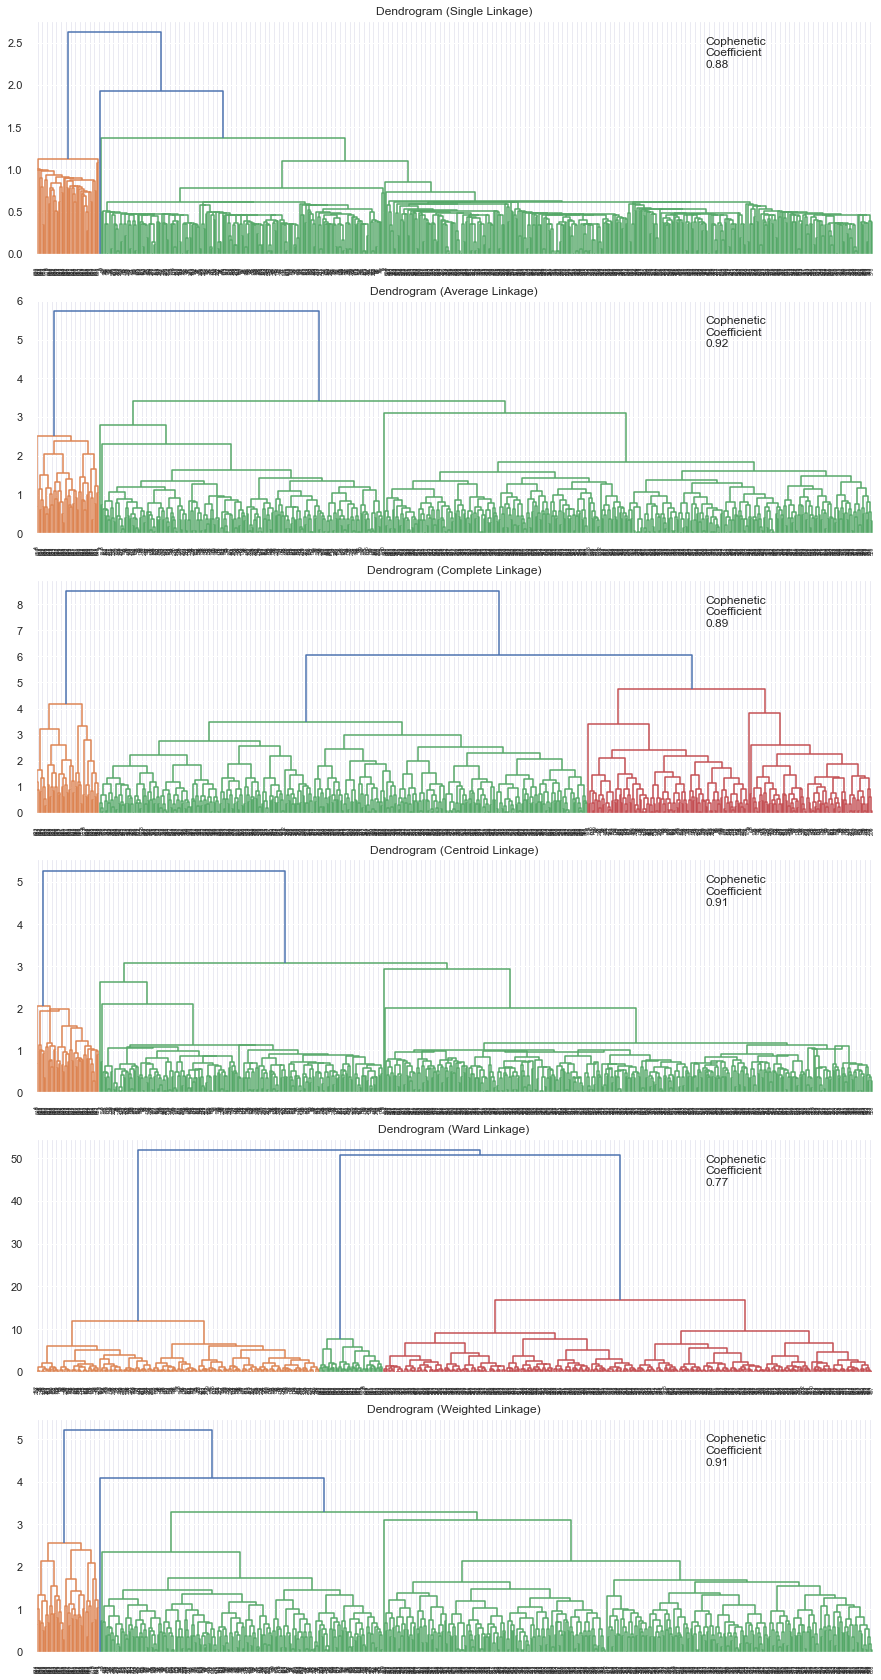

In [34]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
    compare.append([method, coph_corr])

**Observations**
 - Dendrogram with ward linkage method shows distinct and separate cluster
 - Average is showing a better Cophenetic Coefficient

In [35]:
# Create and print dataframe to compare Cophenetic Coefficient for each linkage
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

Linkage  Cophenetic Coefficient
0    single                0.878868
1   average                0.916873
2  complete                0.886052
3  centroid                0.913470
4      ward                0.774234
5  weighted                0.913339

**Observations**
- The Average linkage is showing the best score.

In [36]:
distance_metrics = [ 'mahalanobis','cityblock']
linkage_methods = ['average', 'weighted']

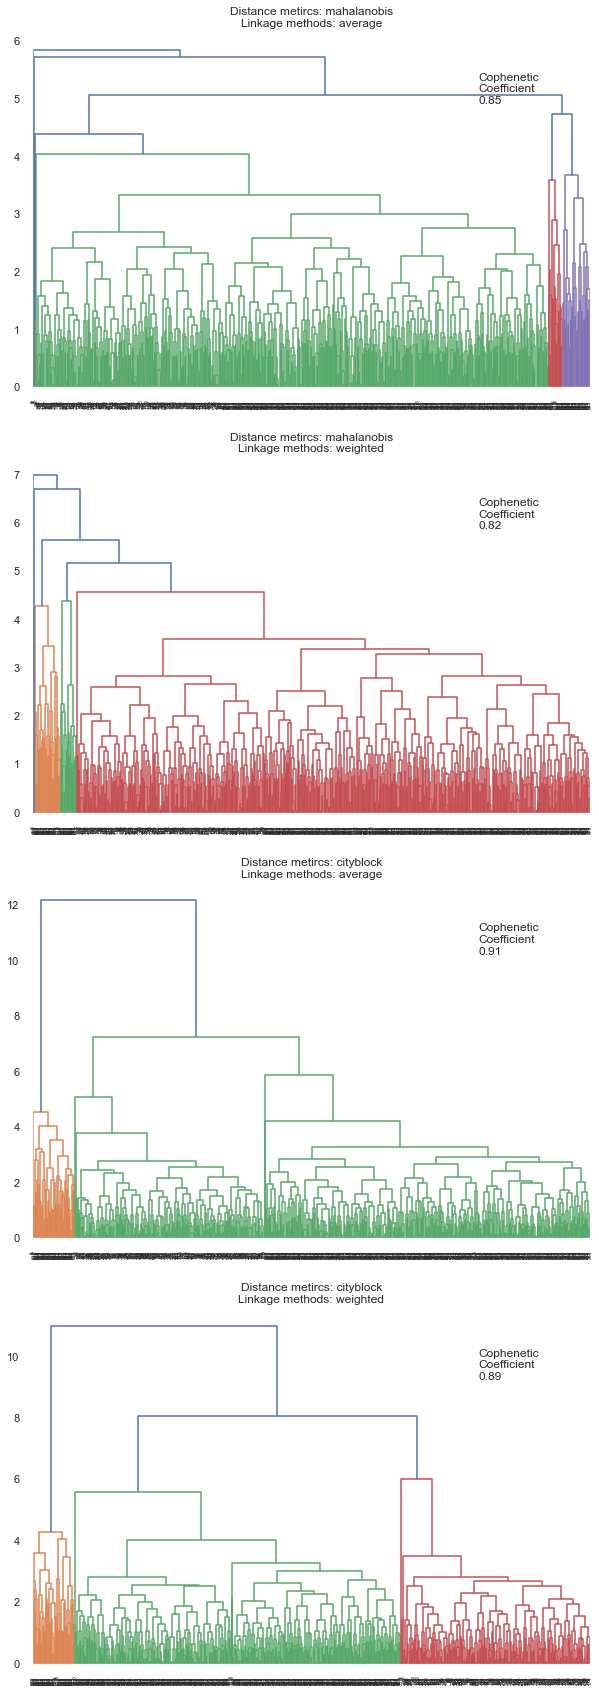

In [37]:
# Create a subplot image
fig, axs = plt.subplots(len(distance_metrics)+len(distance_metrics), 1, figsize=(10, 30))
i=0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        dendrogram(Z,  ax=axs[i]);
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))
        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                        (0.80, 0.80),
                        xycoords='axes fraction')
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))                        
        i +=1
       

**Observations**
- 3 cluster would be appropriate number of cluster from dendrogram with average linkage method  

In [38]:
#Trying with K value as 3
HCmodel = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [39]:
data['HC_Clusters'] = HCmodel.labels_

In [40]:
cluster_profile = data.groupby('HC_Clusters').mean()

In [41]:
cluster_profile['count_in_each_segments'] = data.groupby('HC_Clusters')['Total_visits_bank'].count().values

In [42]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

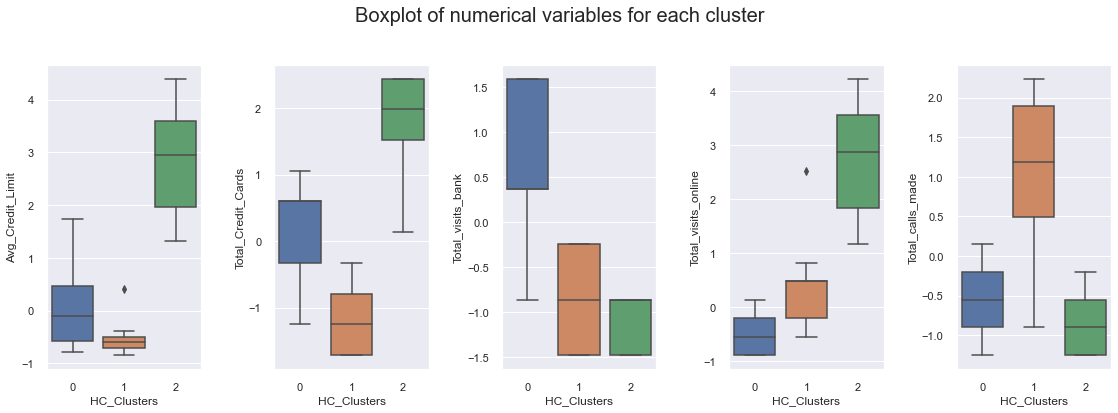

In [43]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Observation**
- This boxplot will be further analized below.

## <a id = "link6"></a>5. Calculate the average silhouette score for both methods. (5 marks)

### K-Means Silhouette score

In [44]:
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, average silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, average silhouette score is 0.47462027261844664)
For n_clusters = 3, average silhouette score is 0.5621118591624856)
For n_clusters = 4, average silhouette score is 0.3791841617437297)
For n_clusters = 5, average silhouette score is 0.2794839510815399)
For n_clusters = 6, average silhouette score is 0.263229026470891)
For n_clusters = 7, average silhouette score is 0.25474228760613826)
For n_clusters = 8, average silhouette score is 0.24748281669835998)
For n_clusters = 9, average silhouette score is 0.21459489343453775)


**Observation**
- The average for the silouette scores is 0.332 for the K-means clustering.

### Hierarchical Clustering Silhouette score

In [45]:
max_d = 8

In [46]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

In [47]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(subset_scaled,clusters)

0.5157182558881063

**Observation**
- The average for the Hierarchial Clustering silouette score is 0.515 and clearly better than the K-Means clustering score of 0.332.

## <a id = "link5"></a>6. Compare each cluster of K-means to Hierarchical clusters. (5 marks)

### K-Means Cluster

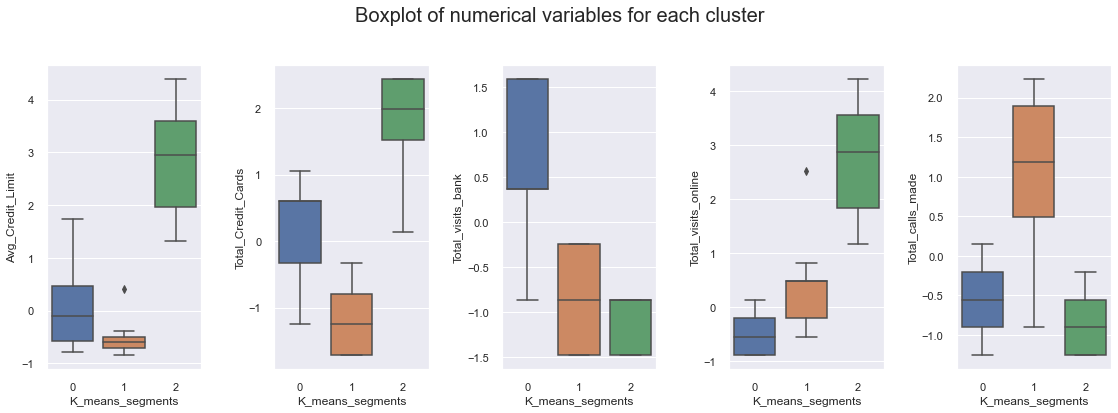

In [48]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

### Hierarchical cluster

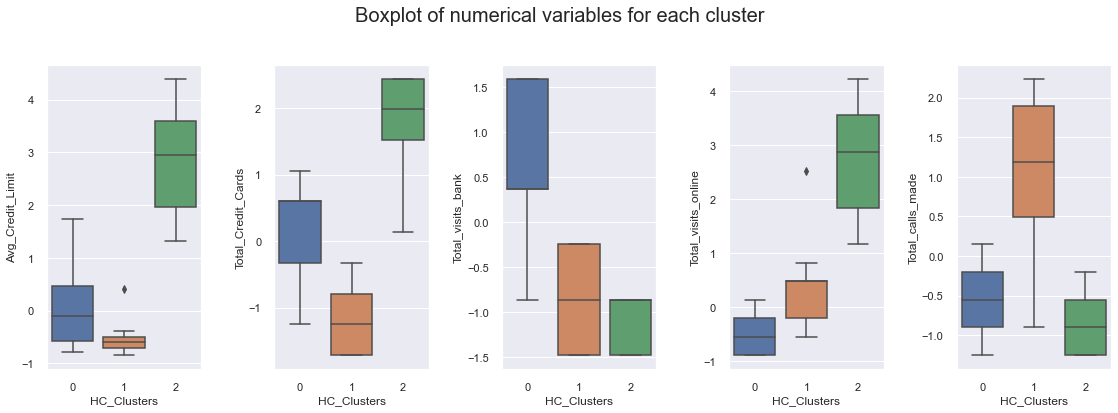

In [49]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Observation**
- After comparing the two different sets of boxplots the numbers appear to be almost identitical.
- Avg_Credit_Limit: this cluster contains a segment of high credit limits but also a separate cluster of low credit limit customers.
- Total_Credit_Cards: this cluster contains a segment of customers with at least two credit cards while a majority only have one card.
- Total_visits_bank: this cluster contains a segment of customers that visit the bank while two other cluster never visit the bank.
- Total_visits_online: this cluster contains a segment of customers that visit the bank online while two other clusters never visit the bank online.
- Total_calls_made: this cluster contains a segment of customers that call the bank while two other clusters never call.

## <a id = "link7"></a>7. Analysis of the clusters formed, tell us how is one cluster different from another, and answer all the key questions. (10 marks)

### 1.	How many different segments of customers are there?
- From the analysis there appears to be three distinct customer bases that are identified.

### 2.	How are these segments different from each other?
- These three customer segments are very different in many ways but do have minor overlap in small ways.  Most of the clusters have one segment participating in visiting the bank while the other two do not participate.

### 3.	What are your recommendations to the bank on how to better market to and service these customers?

- Avg_Credit_Limit: it is recommended that the bank reach out more to the lower credit limit customers to ensure their needs are met through a direct marketing campaign.  Likewise, it is important to focus on the high credit limit customers to ensure they are catered to and are happy with the bank's service.
- Total_Credit_Cards: this field is equally split between the three clusters and shows customers that have more than one card, one card, and no cards.  It is recommended that customers with no card be marketed to first, then the multiple card customers, and finally the single card members.
- Total_visits_bank: it is recommended that the bank reach out to the customers making the personal visits to the bank and cater to their individual needs.  The other two categories do not visit so they are highly unlikely to be critical of visits if they have never visited the bank.  This is why the focus should be on the people who have visited the bank.
- Total_visits_online: it is recommended that the bank reach out to the customers who visit online and cater to their individual needs.  The other two categories do not visit the bank online so they are highly unlikely to be critical of web services if they have never visited the bank online.  This is why the focus should be on the people who have visited the bank online.
- Total_calls_made: it is recommended that the bank reach out to the customers who called and cater to their individual needs.  The other two categories have not called the bank so they are highly unlikely to be critical of call services if they have never called the bank.  This is why the focus should be on the people who have called the bank via telephone services.

## <a id = "link8"></a> 8. Notebook - Overall quality (4 points)